# A. Treasury Yield Curve Construction

* Data from the product page of each of the following, as of 9/25/2025

$$
$$

| Ticker | Fund |
|---|---|
| SGOV | iShares 0-3 Month Treasury Bond ETF |
| SHY  | iShares 1-3 Year Treasury Bond ETF |
| IEI  | iShares 3-7 Year Treasury Bond ETF |
| IEF  | iShares 7-10 Year Treasury Bond ETF |
| TLH  | iShares 10-20 Year Treasury Bond ETF |
| TLT  | iShares 20+ Year Treasury Bond ETF |

$$
$$

In [67]:
import pandas as pd

etfs = ['SGOV', 'SHY', 'IEI', 'IEF', 'TLH', 'TLT']

dfs = []

for etf in etfs:
    df = pd.read_csv(f'data/{etf}_holdings.csv', header=9)

    # Coerce date-like columns after parsing
    for c in ['Maturity', 'Accrual Date', 'Effective Date']:
        if c in df.columns:
            df[c] = pd.to_datetime(df[c].astype(str).str.strip(), format='%b %d, %Y', errors='coerce')

    mask_treasury = df['Name'].astype(str).str.contains('TREASURY', case=False, na=False)
    mask_bond = df['Name'].astype(str).str.contains('BOND', case=False, na=False)
    mask_note = df['Name'].astype(str).str.contains('NOTE', case=False, na=False)
    mask_bill = df['Name'].astype(str).str.contains('BILL', case=False, na=False)
    df = df.loc[mask_treasury & (mask_bill | mask_bond | mask_note)][['Name', 'Price', 'Maturity', 'Coupon (%)', 'Accrual Date', 'Effective Date']]
    dfs.append(df)

all = pd.concat(dfs).sort_values(by='Maturity').reset_index(drop=True)
all.to_csv('data/all.csv')

## From ZCB Only

C:\Users\zhang\AppData\Local\Temp\ipykernel_33780\3710992934.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Base Date'] = base_date


<Axes: >

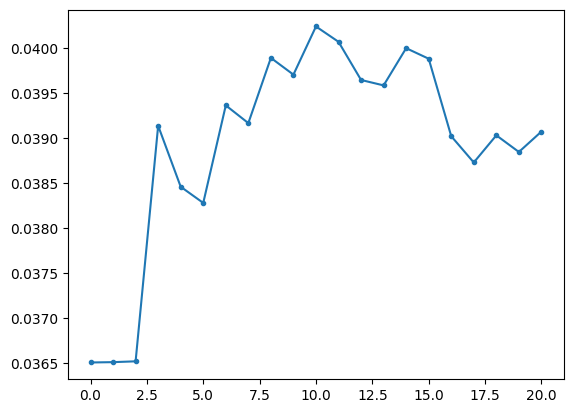

In [103]:
from numpy import log
from pandas import Series

base_date = pd.Timestamp(2025, 9, 25)

df = all[all['Coupon (%)']==0]
df['Base Date'] = base_date
T = (df['Maturity'] - df['Base Date']).apply(lambda time_diff: time_diff.days).values/365
P = df['Price'].values

Series(-log(P/100)/T).plot(style='.-')